In [1]:
%matplotlib inline
import seaborn as sns
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sea
import matplotlib as mpl
from wordcloud import WordCloud
import warnings
warnings.filterwarnings("ignore")
mpl.rcParams['font.sans-serif'] = ['KaiTi']
mpl.rcParams['font.serif'] = ['KaiTi']
plt.rcParams['font.size'] = 15.0
plt.rcParams['xtick.labelsize'] = 'large'
plt.rcParams['ytick.labelsize'] = 'large'

In [2]:
movie_data=pd.read_excel(r'movieData.xlsx',header=1,index_col=0)

In [3]:
movie_data.head()

,rank,movieName,movieShortShow,Introduction,director,mainActor,score,year,type,country,language,review,starFive,starFour,starThree,starTwo,starOne
0,,,,,,,,,,,,,,,,,
1,1,肖申克的救赎,希望让人自由。,20世纪40年代末，小有成就的青年银行家安迪（蒂姆·罗宾斯TimRobbins饰）因涉嫌杀害...,弗兰克·德拉邦特,蒂姆·罗宾斯 / 摩根·弗里曼 / 鲍勃·冈顿 / 威廉姆·赛德勒 / 克兰西·布朗 / ...,9.6,1994,剧情 / 犯罪,美国,英语,922096,82.3%,15.6%,2.0%,0.1%,0.1%
2,2,霸王别姬,风华绝代。,段小楼（张丰毅）与程蝶衣（张国荣）是一对打小一起长大的师兄弟，两人一个演生，一个饰旦，一向配...,陈凯歌,张国荣 / 张丰毅 / 巩俐 / 葛优 / 英达 / 蒋雯丽 / 吴大维 / 吕齐 / 雷...,9.5,1993,剧情 / 爱情 / 同性,中国大陆 / 香港,汉语普通话,665653,79.4%,17.7%,2.7%,0.2%,0.1%
3,3,这个杀手不太冷,怪蜀黍和小萝莉不得不说的故事。,里昂（让·雷诺饰）是名孤独的职业杀手，受人雇佣。一天，邻居家小姑娘马蒂尔达（纳塔丽·波特曼饰...,吕克·贝松,让·雷诺 / 娜塔莉·波特曼 / 加里·奥德曼 / 丹尼·爱罗 / 彼得·阿佩尔 / 迈克...,9.4,1994,剧情 / 动作 / 犯罪,法国,英语 / 意大利语 / 法语,875295,73.8%,22.5%,3.4%,0.2%,0.1%
4,4,阿甘正传,一部美国近现代史。,阿甘（汤姆·汉克斯饰）于二战结束后不久出生在美国南方阿拉巴马州一个闭塞的小镇，他先天弱智，智...,罗伯特·泽米吉斯,汤姆·汉克斯 / 罗宾·怀特 / 加里·西尼斯 / 麦凯尔泰·威廉逊 / 莎莉·菲尔德 /...,9.4,1994,剧情 / 爱情,美国,英语,744526,73.9%,22.2%,3.5%,0.2%,0.1%
5,5,美丽人生,最美的谎言。,犹太青年圭多（罗伯托·贝尼尼）邂逅美丽的女教师多拉（尼可莱塔·布拉斯基），他彬彬有礼的向多拉...,罗伯托·贝尼尼,罗伯托·贝尼尼 / 尼可莱塔·布拉斯基 / 乔治·坎塔里尼 / 朱斯蒂诺·杜拉诺 / 赛尔...,9.5,1997,剧情 / 喜剧 / 爱情 / 战争,意大利,意大利语 / 德语 / 英语,434784,77.5%,19.3%,2.9%,0.2%,0.1%


# 1.数据探索性分析

## 1.1 电影导演分析

Text(0,0.5,'Director')

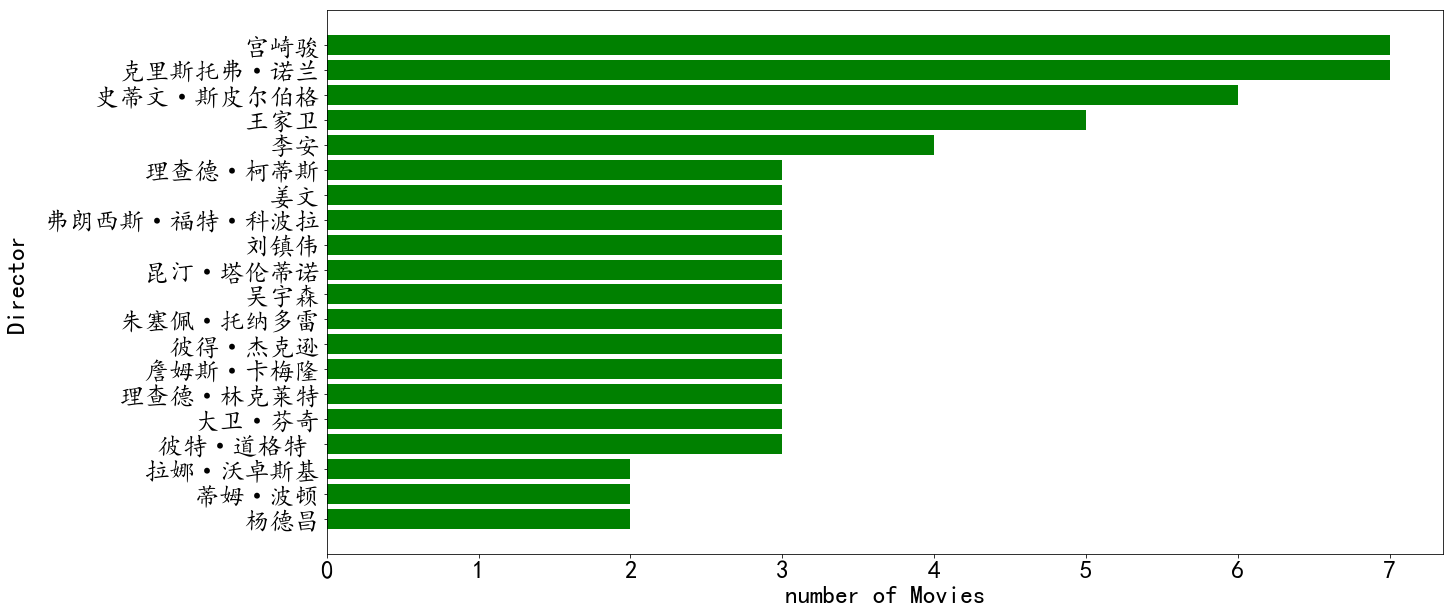

In [4]:
font = {'family' : 'serif',  
        'color'  : 'black',  
        'weight' : 'normal',  
        'size'   : 25,  
        }  
directors=list(movie_data['director'])
dir_dict = {}
for director in directors:
    director_array=director.split('/')
    for item in director_array:
        dir_dict[item]=dir_dict.get(item,0)+1
dir_pd=pd.DataFrame.from_dict(dir_dict,orient='index')
dir_pd.columns=['count']
dir_pd['per']=dir_pd['count']/sum(dir_pd['count'])
dir_pd.sort_values(['count'],axis=0,inplace=True,ascending=False)
fig,ax=plt.subplots(1,1,figsize=(20,10))
ax.barh(np.arange(1,21),dir_pd['count'][:20], color='green',ecolor='black')
ax.set_yticks(np.arange(1,21))
ax.set_yticklabels(dir_pd.index[:20],fontdict=font)
ax.set_xticklabels(np.arange(0,8),size=25)
ax.invert_yaxis()
ax.set_xlabel('number of Movies',size=25)
ax.set_ylabel('Director',size=25)

## 1.2 电影演员分析

'float' object has no attribute 'split'


Text(0,0.5,'Acter')

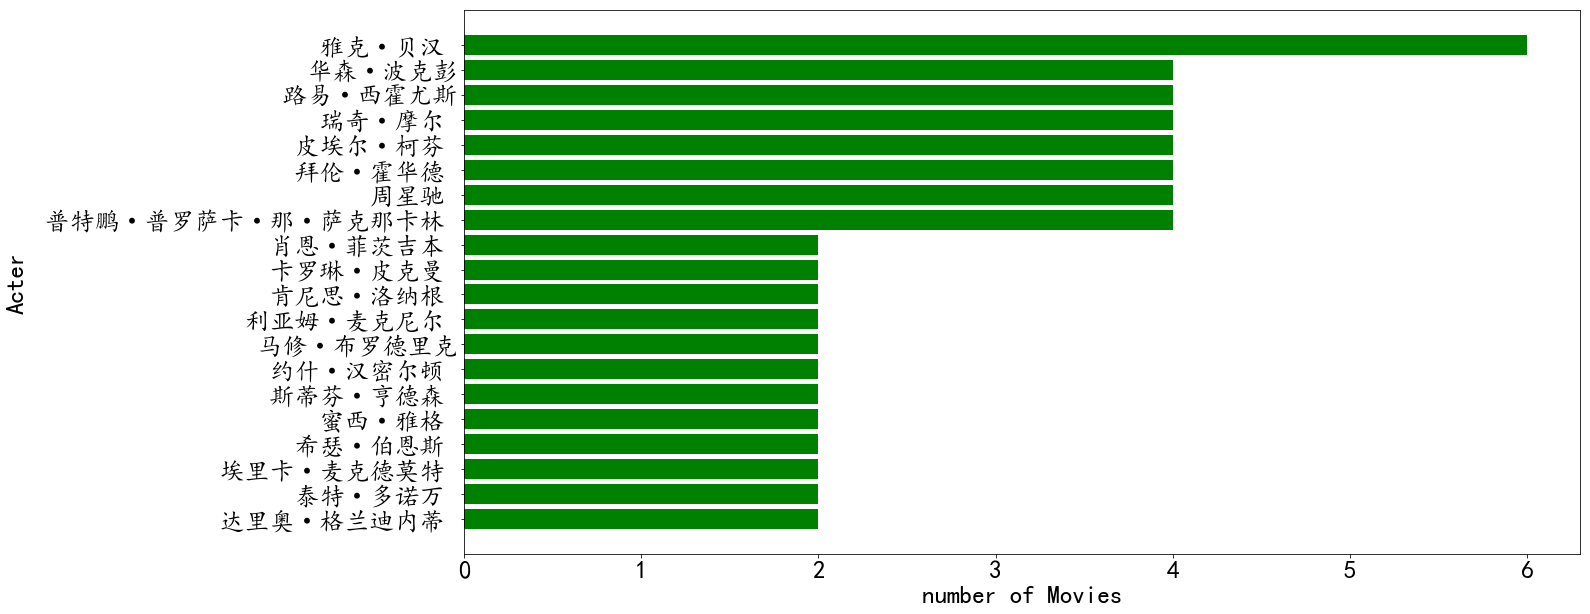

In [5]:
font = {'family' : 'serif',  
        'color'  : 'black',  
        'weight' : 'normal',  
        'size'   : 25,  
        }  
acts=list(movie_data['mainActor'])
act_dict = {}
for act in acts:
    try:
        act_array=act.split('/')
        for item in act_array:
            act_dict[item]=dir_dict.get(item,0)+1
    except Exception as e:
        print(e)
dir_pd=pd.DataFrame.from_dict(act_dict,orient='index')
dir_pd.columns=['count']
dir_pd['per']=dir_pd['count']/sum(dir_pd['count'])
dir_pd.sort_values(['count'],axis=0,inplace=True,ascending=False)
fig,ax=plt.subplots(1,1,figsize=(20,10))
ax.barh(np.arange(1,21),dir_pd['count'][:20], color='green',ecolor='black')
ax.set_yticks(np.arange(1,21))
ax.set_yticklabels(dir_pd.index[:20],fontdict=font)
ax.set_xticklabels(np.arange(0,100),size=25)
ax.invert_yaxis()
ax.set_xlabel('number of Movies',size=25)
ax.set_ylabel('Acter',size=25)

## 1.3 电影年份分析

In [6]:
#电影的年份分别以数量，评分取平均方式聚合。
data=pd.DataFrame(movie_data.groupby(['year']).agg({'rank':'count','score':'mean'}))
data.columns=['yearNum','avgscore']
year_df=data.sort_values(['yearNum'],ascending=False)
year_df[:15]

,yearNum,avgscore
year,,
2010,13,8.661538
2004,12,8.716667
2009,12,8.783333
1994,11,9.000000
2001,11,8.754545
2002,10,8.730000
2013,10,8.720000
2011,10,8.770000
2008,10,8.780000


Text(0.5,1,'year-score')

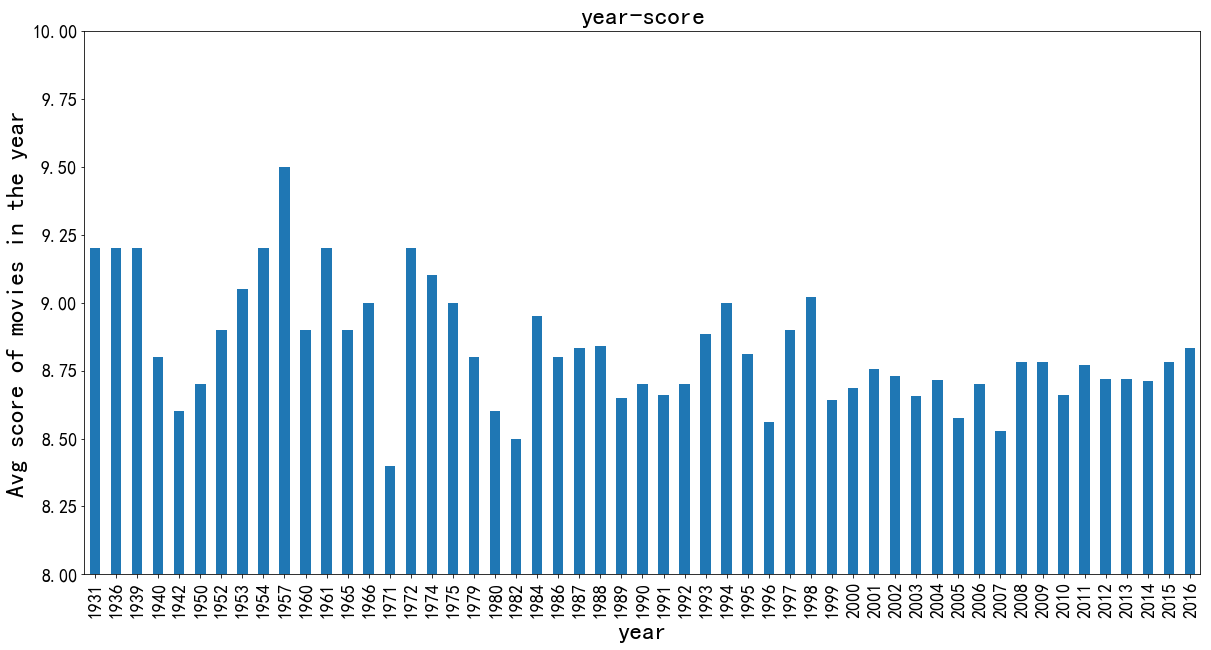

In [7]:
pd.DataFrame(data['avgscore']).plot(kind='bar',figsize =(20,10),legend =False)
plt.ylim(8,10)
plt.xlabel('year',size=25)
plt.ylabel('Avg score of movies in the year',size=25)
plt.title('year-score',size=25)

(array([  0.,   2.,   4.,   6.,   8.,  10.,  12.,  14.]),
 <a list of 8 Text yticklabel objects>)

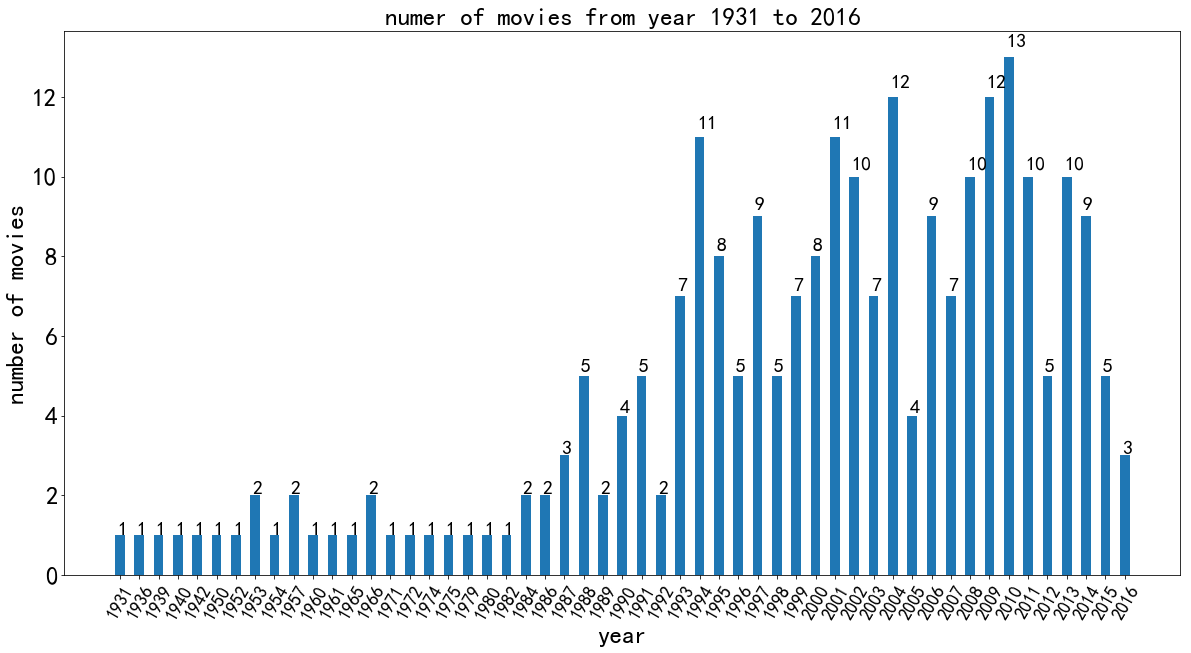

In [8]:
fig,ax=plt.subplots(1,1,figsize=(20,10))
rect=ax.bar(np.arange(len(data.index)),data['yearNum'],width=0.5)
for rec in rect:
    x=rec.get_x()
    height=rec.get_height()
    ax.text(x+0.1,1.02*height,str(height),fontsize=20)
ax.set_xticks(np.arange(len(data.index)))
ax.set_xticklabels(data.index,size=18,rotation=60)
ax.set_xlabel('year',size=25)
ax.set_ylabel('number of movies',size=25)
ax.set_title('numer of movies from year 1931 to 2016',fontsize=25)
plt.yticks(fontsize=25) 

In [9]:
movie_data[movie_data['year']==2010]

,rank,movieName,movieShortShow,Introduction,director,mainActor,score,year,type,country,language,review,starFive,starFour,starThree,starTwo,starOne
0,,,,,,,,,,,,,,,,,
9,9,盗梦空间,诺兰给了我们一场无法盗取的梦。,道姆·柯布（莱昂纳多·迪卡普里奥LeonardoDiCaprio饰）与同事阿瑟（约瑟夫·戈登...,克里斯托弗·诺兰,莱昂纳多·迪卡普里奥 / 约瑟夫·高登-莱维特 / 艾伦·佩吉 / 汤姆·哈迪 / 渡边谦...,9.3,2010,剧情 / 动作 / 科幻 / 悬疑 / 冒险,美国 / 英国,英语 / 日语 / 法语,793348,68.2%,26.8%,4.7%,0.3%,0.1%
26,28,怦然心动,真正的幸福是来自内心深处。,布莱斯（卡兰•麦克奥利菲CallanMcAuliffe饰）全家搬到小镇，邻家女孩朱丽（玛德琳...,罗伯·莱纳,玛德琳·卡罗尔 / 卡兰·麦克奥利菲 / 瑞贝卡·德·莫妮 / 安东尼·爱德华兹 / 约翰...,8.9,2010,剧情 / 喜剧 / 爱情,美国,英语,573931,55.8%,35.0%,8.6%,0.6%,0.1%
74,76,让子弹飞,你给我翻译翻译，神马叫做TMD的惊喜。,民国年间，花钱捐得县长的马邦德（葛优饰）携妻（刘嘉玲饰）及随从走马上任。途经南国某地，遭劫匪...,姜文,姜文 / 葛优 / 周润发 / 刘嘉玲 / 陈坤 / 张默 / 姜武 / 周韵 / 廖凡 ...,8.7,2010,剧情 / 喜剧 / 动作 / 西部,中国大陆 / 香港,汉语普通话 / 四川话 / 山西话,631684,49.8%,36.9%,11.6%,1.2%,0.5%
84,86,禁闭岛,昔日翩翩少年，今日大腹便便。,本片根据美国小说家丹尼斯·勒翰（DennisLehane）的同名小说改编。1954年，联邦警...,马丁·斯科塞斯,莱昂纳多·迪卡普里奥 / 马克·鲁弗洛 / 本·金斯利 / 马克斯·冯·叙多夫 / 米歇尔...,8.6,2010,剧情 / 悬疑 / 惊悚,美国,英语 / 德语,363907,44.2%,44.3%,10.6%,0.7%,0.2%
93,95,告白,没有一人完全善，也没有一人完全恶。,一所平凡的中学，1年B组即将迎来春假。不知天高地厚的学生们肆意吵闹，殊不知一场绵亘数月的风暴...,中岛哲也,松隆子 / 冈田将生 / 木村佳乃 / 西井幸人 / 桥本爱 / 芦田爱菜 / 三吉彩花 ...,8.7,2010,剧情 / 惊悚,日本,日语,346154,48.8%,38.0%,11.2%,1.4%,0.6%
109,111,驯龙高手,和谐的生活离不开摸头与被摸头。,维京岛国的少年小嗝嗝（杰伊•巴鲁切尔JayBaruchel配音）是部落统领伟大的斯托里克（杰...,迪恩·德布洛斯 / 克里斯·桑德斯,杰伊·巴鲁切尔 / 杰拉德·巴特勒 / 克雷格·费格森 / 亚美莉卡·费雷拉 / 乔纳·希...,8.7,2010,喜剧 / 动画 / 家庭 / 奇幻 / 冒险,美国,英语,285373,45.7%,42.3%,11.4%,0.6%,0.1%
117,119,岁月神偷,岁月流逝，来日可追。,60年代的香港，风云变幻。一面要忍受港英政府的压制，一面又受到内地运动的波及，更要面对不时登...,罗启锐,吴君如 / 任达华 / 钟绍图 / 李治廷 / 蔡颖恩 / 秦沛 / 夏萍 / 谷德昭 /...,8.6,2010,剧情 / 家庭,香港 / 中国大陆,粤语 / 汉语普通话 / 英语 / 上海话 / 法语,307983,45.6%,40.8%,12.4%,0.9%,0.2%
118,120,神偷奶爸,Mr. I Don't Care其实也有Care的时候。,超级坏蛋格鲁（史蒂夫·卡瑞尔SteveCarell配音）在听说埃及金字塔被盗的新闻后不满市面...,皮埃尔·柯芬 / 克里斯·雷纳德,史蒂夫·卡瑞尔 / 杰森·席格尔 / 拉塞尔·布兰德 / 朱莉·安德鲁斯 / 威尔·阿奈特...,8.5,2010,喜剧 / 动画 / 冒险,美国 / 法国,英语,375589,40.3%,45.5%,13.3%,0.8%,0.1%
119,121,借东西的小人阿莉埃蒂,曾经的那段美好会沉淀为一辈子的记忆。,虽然患有心脏方面的疾病，但是少年翔（神木隆之介配音）的父母依然对他疏于呵护。为了准备即将到来...,米林宏昌,志田未来 / 神木隆之介 / 树木希林 / 三浦友和 / 大竹忍 / 竹下景子 / 藤原龙也,8.7,2010,动画 / 奇幻 / 冒险,日本,日语,216499,46.3%,41.8%,11.3%,0.5%,0.1%


## 1.4 电影类型分析

Text(0,0.5,'number of movies')

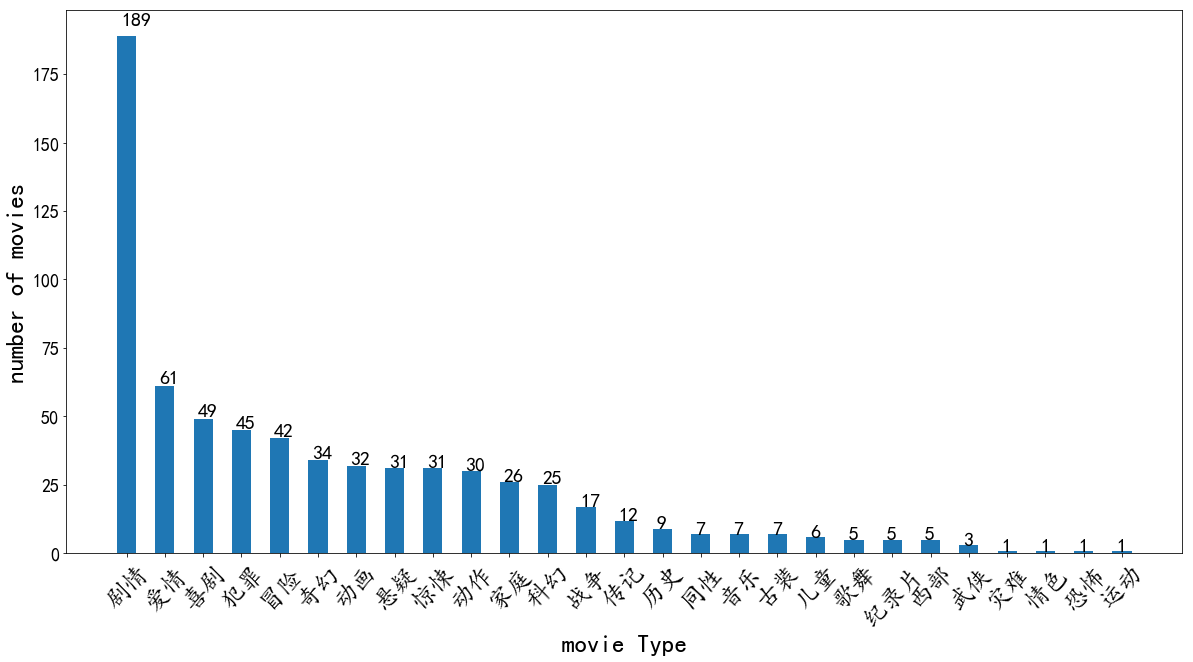

In [10]:
type_list=list(movie_data['type'])
type_dict = {}
for type_ in type_list:
    try:
        type_array=type_.split('/')
        for item in type_array:
            type_dict[item.strip()]=type_dict.get(item.strip(),0)+1
    except Exception as e:
        print(e)
type_pd=pd.DataFrame.from_dict(type_dict,orient='index')
type_pd.columns=['count']
type_pd.sort_values(['count'],inplace=True,ascending=False)
fig,ax=plt.subplots(1,1,figsize=(20,10))
rect=ax.bar(np.arange(len(type_pd.index)),type_pd['count'],width=0.5)
for rec in rect:
    x=rec.get_x()
    height=rec.get_height()
    ax.text(x+0.1,1.02*height,str(height),fontsize=20)
ax.set_xticks(np.arange(len(type_pd.index)))
ax.set_xticklabels(type_pd.index,size=25,rotation=45)
ax.set_xlabel('movie Type',size=25)
ax.set_ylabel('number of movies',size=25)

## 2. 电影口碑一致性分析

In [11]:
def f(x):
    return float(x.strip('%'))/100
g=lambda x: 5*f(x[0])+4*f(x[1])+3*f(x[2])+2*f(x[3])+f(x[4])
calstd=lambda x: np.sqrt(sum(list(map(f,x[:5]))*(np.arange(5,0,-1)-x[5])**2))
movie_data['starMean']=movie_data[['starFive','starFour','starThree','starTwo','starOne']].apply(g,axis=1)
movie_data['starStd']=movie_data[['starFive','starFour','starThree','starTwo','starOne','starMean']].apply(calstd,axis=1)

In [19]:
data=movie_data.drop(['Introduction','mainActor','starFive','starFour','starThree','starTwo','starOne'],axis=1)

In [24]:
data.sort_values(['starStd'],ascending=False)[:5]

,rank,movieName,movieShortShow,director,score,year,type,country,language,review,starMean,starStd
0,,,,,,,,,,,,
214,218,穆赫兰道,大卫·林奇的梦境迷宫。,大卫·林奇,8.3,2001,剧情 / 悬疑 / 惊悚,法国 / 美国,英语 / 西班牙语,230672,4.165,0.892817
179,183,秒速5厘米,青春就是放弃和怀念。,新海诚,8.3,2007,剧情 / 爱情 / 动画,日本,日语,290969,4.164,0.860874
199,203,这个男人来自地球,科幻真正的魅力不是视觉效果能取代的。,理查德·沙因克曼,8.5,2007,剧情 / 科幻,美国,英语,175971,4.234,0.846903
107,109,萤火虫之墓,幸福是生生不息，却难以触及的远。,高畑勋,8.7,1988,剧情 / 动画 / 战争,日本,日语,204438,4.338,0.823977
215,219,初恋这件小事,黑小鸭速效美白记。,普特鹏·普罗萨卡·那·萨克那卡林 / 华森·波克彭,8.3,2010,剧情 / 喜剧 / 爱情,泰国,泰语 / 印度尼西亚语 / 英语,449790,4.130,0.816184


In [13]:
movie_data.sort_values(['starStd'],ascending=False)[:5]

,rank,movieName,movieShortShow,Introduction,director,mainActor,score,year,type,country,language,review,starFive,starFour,starThree,starTwo,starOne,starMean,starStd
0,,,,,,,,,,,,,,,,,,,
214,218,穆赫兰道,大卫·林奇的梦境迷宫。,深夜的穆赫兰道发生一桩车祸，女子丽塔（劳拉·赫利LauraHarring饰）在车祸中失了忆。...,大卫·林奇,娜奥米·沃茨 / 劳拉·哈灵 / 安·米勒 / 贾斯汀·塞洛克斯 / 斯科特·科菲 / 梅...,8.3,2001,剧情 / 悬疑 / 惊悚,法国 / 美国,英语 / 西班牙语,230672,41.9%,38.2%,15.7%,2.8%,1.5%,4.165,0.892817
179,183,秒速5厘米,青春就是放弃和怀念。,如果，樱花掉落的速度是每秒5厘米，那么两颗心需要多久才能靠近？\n\n少年时，贵树（水橋研二...,新海诚,水桥研二 / 近藤好美 / 尾上绫华 / 花村怜美 / 水野理纱,8.3,2007,剧情 / 爱情 / 动画,日本,日语,290969,41.9%,36.6%,18.2%,2.6%,0.7%,4.164,0.860874
199,203,这个男人来自地球,科幻真正的魅力不是视觉效果能取代的。,一个普通男人的秘密在他的辞职事件中开始显示出端倪。历史教授约翰奥德曼（DavidLeeSmi...,理查德·沙因克曼,大卫·李·史密斯 / 托尼·托德 / 约翰·比灵斯列 / 安妮卡·彼得森 / 阿丽西丝·索...,8.5,2007,剧情 / 科幻,美国,英语,175971,45.3%,36.9%,14.6%,2.3%,0.9%,4.234,0.846903
107,109,萤火虫之墓,幸福是生生不息，却难以触及的远。,美日战争爆发，14岁的清太带着年幼的妹妹到处逃命，当他们到达防空洞的时候，母亲已身受重伤，没...,高畑勋,辰己努 / 白石绫乃 / 志乃原良子 / 山口朱美 / 端田宏三,8.7,1988,剧情 / 动画 / 战争,日本,日语,204438,52.0%,33.9%,11.3%,1.6%,1.1%,4.338,0.823977
215,219,初恋这件小事,黑小鸭速效美白记。,初中生小水相貌平平，家境一般，所以在学校里并不受重视。但是她心地善良，又有一群死党，日子过得...,普特鹏·普罗萨卡·那·萨克那卡林 / 华森·波克彭,平采娜·乐维瑟派布恩 / 马里奥·毛瑞尔 / 苏达拉·布查蓬 / 雅尼卡·桑普蕾舞 / 诺...,8.3,2010,剧情 / 喜剧 / 爱情,泰国,泰语 / 印度尼西亚语 / 英语,449790,36.9%,41.9%,18.8%,2.0%,0.5%,4.130,0.816184


In [14]:
poly = np.polyfit(movie_data['starMean'], movie_data['starStd'], 2) 
poly

array([-0.50104656,  4.06670825, -7.48532016])

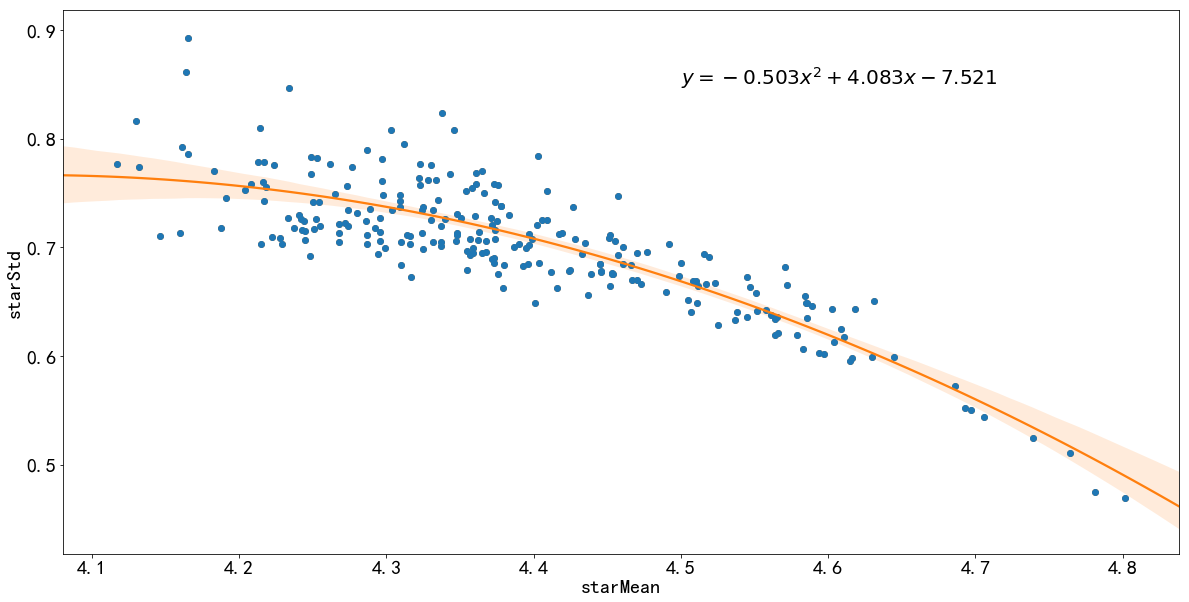

In [15]:
fig,ax=plt.subplots(1,1,figsize=(20,10))
ax.plot(movie_data['starMean'],movie_data['starStd'],'o')
plt.xticks(fontsize = 20)
plt.yticks(fontsize=20)
sns.regplot(movie_data['starMean'],movie_data['starStd'],order=2)
plt.text(4.5,0.85,r'$y=-0.503x^2+4.083x-7.521$',size=20)
plt.xlabel('starMean',fontsize=20)
plt.ylabel('starStd',fontsize=20)
plt.savefig(r'Movie_mean-std')

## 3. 电影剧情概要词云

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\huang\AppData\Local\Temp\jieba.cache
Loading model cost 0.911 seconds.
Prefix dict has been built succesfully.


{'电影': 1.0, '人生': 0.591765033918091, '天使': 0.5797969075649329, '世界': 0.5080105589704573, '爱情': 0.49174680515700553, '超越': 0.48797204322939597, '科幻': 0.44407851568306395, '上帝': 0.42988241520010406, '信仰': 0.4208518732676061, '美丽': 0.40220223363295626, '生活': 0.3910853660702082, '没有': 0.3824535610043186, '不能': 0.37099951204594794, '故事': 0.36923864266570805, '魅力': 0.3597995368982562, '巅峰': 0.3449528546684979, '情怀': 0.33405309827399937, '青春': 0.3331478249625488, '失去': 0.32704246862377234, '只能': 0.3007003080128327, '大海': 0.28623028752955587, '戏谑': 0.28171861577394686, '作品': 0.28070076527886423, '香港': 0.2785507086433356, '就算': 0.2761800206414384, '出现': 0.27597159401269267, '时间': 0.27449249611394455, '大片': 0.2683938128820055, '力量': 0.2613317438397902, '名字': 0.25559300723266853, '摸头': 0.2553320524707395, '弱者': 0.2547068523750659, '冒险': 0.25293597551408015, '反转': 0.24625077488822847, '怀念': 0.24396083380960998, '内心': 0.24385082877214667, '感受': 0.2430258719604638, '责任': 0.24150508496754616, '不到': 0

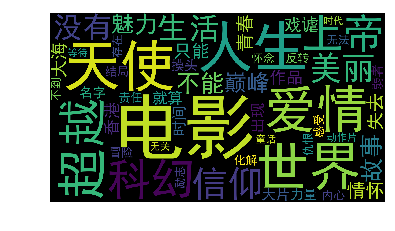

In [16]:
import jieba.analyse
from functools import reduce 
g=lambda x,y:x.replace('\u3000','')+y.replace('\u3000','')
m=reduce(g,movie_data['movieShortShow'])
result=jieba.analyse.textrank(m,topK=50,withWeight=True)
keywords = dict()
for i in result:
    keywords[i[0]]=i[1]
print(keywords)
def show_img(wc):
    plt.figure()
    plt.imshow(wc)
    plt.axis("off")
wc = WordCloud(font_path=u"static/fonts/simhei.ttf",
               max_words=2000,
               width=1920,
               height=1080,
               background_color="black",
               margin=5)
wc.generate_from_frequencies(keywords)
show_img(wc)

{'生活': 1.0, '开始': 0.7609642023802387, '成为': 0.6953597392927562, '决定': 0.6461136209884134, '父亲': 0.6059049479670562, '发现': 0.5587159841136703, '来到': 0.46151014086113756, '妻子': 0.4311684783935472, '世界': 0.4128930914882527, '母亲': 0.39914571370420243, '人类': 0.3988306232228881, '找到': 0.3913279350763798, '朋友': 0.38091989714781493, '故事': 0.3772931170854559, '工作': 0.344317707898653, '学校': 0.33171834820710017, '美国': 0.32975820962708396, '离开': 0.3289368884757726, '帮助': 0.3191414874467679, '无法': 0.3185305164173178, '得到': 0.29261766208182205, '没有': 0.2909356254516669, '喜欢': 0.2901876704942568, '发生': 0.28354505839898847, '公司': 0.2831893500559887, '人生': 0.27599506772545745, '寻找': 0.27546809990907206, '女儿': 0.2704946583420657, '配音': 0.2695752446160879, '本片': 0.26075137100323453, '进行': 0.25502357418246896, '电影': 0.2514818465123596, '电影节': 0.2511101655764149, '儿子': 0.24709876153107393, '梦想': 0.244051375633494, '秘密': 0.23917883088280142, '回到': 0.23675510068517014, '孩子': 0.23558829274669343, '国际': 0.2324

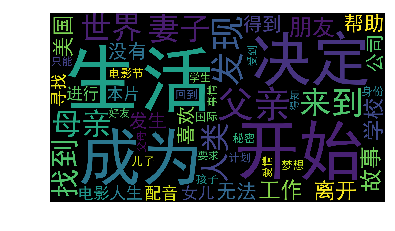

In [77]:
import jieba.analyse
from functools import reduce 
g=lambda x,y:x.replace('\u3000','')+y.replace('\u3000','')
m=reduce(g,movie_data['Introduction'])
result=jieba.analyse.textrank(m,topK=50,withWeight=True)
keywords = dict()
for i in result:
    keywords[i[0]]=i[1]
print(keywords)
def show_img(wc):
    plt.figure()
    plt.imshow(wc)
    plt.axis("off")
wc = WordCloud(font_path=u"static/fonts/simhei.ttf",
               max_words=2000,
               width=1920,
               height=1080,
               background_color="black",
               margin=5)
wc.generate_from_frequencies(keywords)
show_img(wc)